In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

np.random.seed(42)

In [3]:
df = pd.read_csv('classroom_actions.csv')
df.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


In [7]:
# Create dataframe with all control records
control_df = df.query('group=="control"')

# Compute completion rate
control_cr = control_df.query('completed==True').id.count()/control_df.shape[0]

# Display completion rate
control_cr

0.37199519230769229

In [8]:
# Create dataframe with all experiment records
experiment_df = df.query('group=="experiment"')

# Compute completion rate
experiment_cr = experiment_df.query('completed==True').id.count()/experiment_df.shape[0]

# Display completion rate
experiment_cr

0.39353348729792148

In [9]:
# Compute observed difference in completion rates
obs_diff = experiment_cr - control_cr

# Display observed difference in completion rates
obs_diff

0.02153829499022919

In [11]:
# Create sampling distribution for difference in completion rates
# with boostrapping
diffs = np.empty(10000, dtype=float)
size = df.shape[0]
for x in range(10000):
    smplx = df.sample(size,replace=True)
    condf = smplx.query('group=="control"')
    expdf = smplx.query('group=="experiment"')
    concr = condf.query('completed==True').id.count()/condf.shape[0]
    expcr = expdf.query('completed==True').id.count()/expdf.shape[0]
    diffs[x] = expcr - concr

In [12]:
# convert to numpy array
# done already

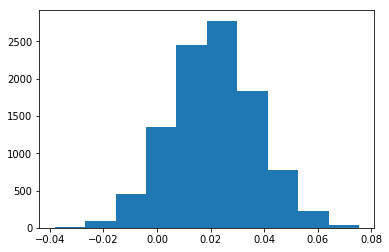

In [13]:
# plot distribution
plt.hist(diffs);

In [14]:
# create distribution under the null hypothesis
null_vals = np.random.normal(0, np.std(diffs), 10000)

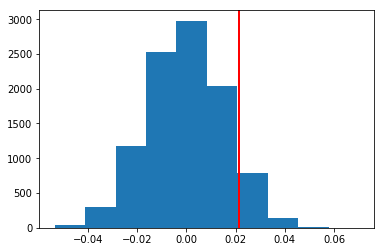

In [15]:
# plot null distribution
plt.hist(null_vals)
# plot line for observed statistic
plt.axvline(obs_diff,color='red',lw=2);

In [17]:
# compute p value
pval = (null_vals > obs_diff).mean()
pval

0.085199999999999998